In [3]:
import numpy as np
import pandas as pd 

from pylab import *

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

from scipy.interpolate import griddata

In [4]:
# Загрузка своей цветовой шкалы
filename = './WhiteBlueGreenYellowRed.txt'
colors = pd.read_csv(filename, header=None, sep='\s+', comment='#')/255
my_cmap = matplotlib.colors.ListedColormap(colors.values)

In [6]:
# Создание переменной с данными
datadir = '../data/' 

In [6]:
# Здесь и чуть ниже был процесс сохранения данных за 10 лет на сервер (но потом это стало не актуально)
year = '1999'

In [7]:
# Записываем данные в разные файлы в зависимости от года

# lr и hr - низкое и высокое разрешение соответственно 

# lhf - latent heat flux (поток скрытого тепла)
lr_file_lhf = datadir+'NAAD77_to_14km_slhf_'+year+'.nc'
hr_file_lhf = datadir+'NAAD14km_slhf_'+year+'.nc'

# shf - sensible heat flux (поток явного тепла)
lr_file_shf = datadir+'NAAD77_to_14km_sshf_'+year+'.nc'
hr_file_shf = datadir+'NAAD14km_sshf_'+year+'.nc'

In [8]:
# Достаем данные по разным потокам скрытого и явного тепла
lrdat_lhf = xr.open_dataset(lr_file_lhf)
hrdat_lhf = xr.open_dataset(hr_file_lhf)

lrdat_shf = xr.open_dataset(lr_file_shf)
hrdat_shf = xr.open_dataset(hr_file_shf)

In [10]:
# Делим данные на 10800 (=сек в 3 часах), так как изначальные данные идут за 3 часа 

lr_lhf = lrdat_lhf.slhf.values[:,271:,143:]/10800
hr_lhf = hrdat_lhf.slhf.values[:,271:,143:]/10800

lr_shf = lrdat_shf.sshf.values[:,271:,143:]/10800
hr_shf = hrdat_shf.sshf.values[:,271:,143:]/10800

In [11]:
# Присваиваем границы
lat_hr = hrdat_lhf.XLAT.values[271:,143:]
lon_hr = hrdat_lhf.XLONG.values[271:,143:]

tim = lrdat_shf.time.values

In [14]:
# Расчет минимума и максимума для потока скрытого тепла

nmax_l_lhf = np.nanmax(lr_lhf) 
nmin_l_lhf = np.nanmin(lr_lhf) 
nmax_h_lhf = np.nanmax(hr_lhf) 
nmin_h_lhf = np.nanmin(hr_lhf)

print(nmin_l_lhf, nmax_l_lhf)
print(nmin_h_lhf, nmax_h_lhf)

-98.98942 619.7034
-100.31407 819.2


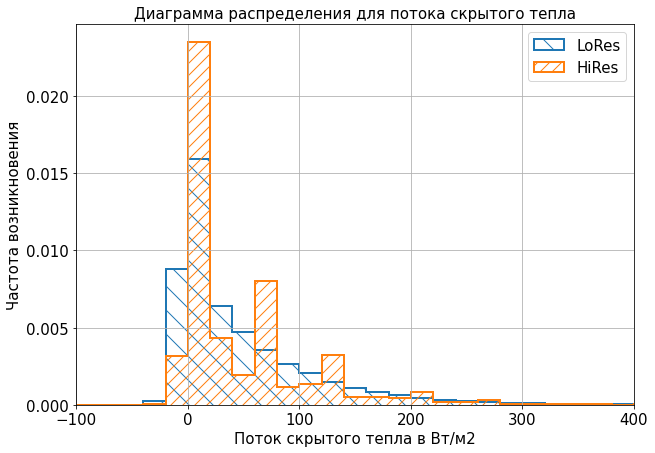

In [15]:
# Построение диаграммы для потока скрытого тепла в разном разрешении
plt.figure(figsize=(10,7))
plt.xlabel('Поток скрытого тепла в Вт/м2', fontsize=15)
plt.ylabel('Частота возникновения', fontsize=15)
plt.title('Диаграмма распределения для потока скрытого тепла', fontsize=15)
plt.gca().tick_params(labelsize=15)

hist_l_lhf, bins1 = np.histogram(lr_lhf, bins=np.arange(-100,820,20), density=True)
plt.xlim([nmin_h_lhf, 400])
plt.stairs(hist_l_lhf, bins1, hatch='\\', linewidth = 2)

hist_h_lhf, bins2 = np.histogram(hr_lhf, bins=np.arange(-100,820,20), density=True)
plt.xlim([nmin_h_lhf, 400])
plt.stairs(hist_h_lhf, bins2, hatch='//', linewidth = 2)
plt.grid()
plt.legend(['LoRes', 'HiRes'], fontsize=15)

In [17]:
# Расчет минимума и максимума для потока явного тепла

nmax_l_shf = np.nanmax(lr_shf) 
nmin_l_shf = np.nanmin(lr_shf) 
nmax_h_shf = np.nanmax(hr_shf) 
nmin_h_shf = np.nanmin(hr_shf)

print(nmin_l_shf, nmax_l_shf)
print(nmin_h_shf, nmax_h_shf)

-266.1223 986.52405
-379.06964 1228.8


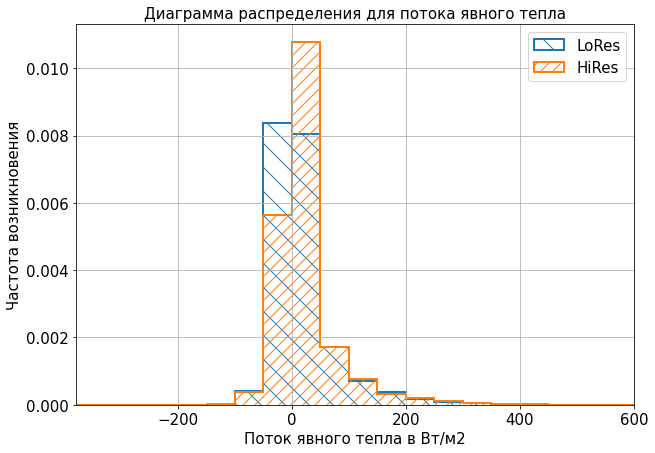

In [18]:
# Построение диаграммы для потока явного тепла в разном разрешении
plt.figure(figsize=(10,7))
plt.xlabel('Поток явного тепла в Вт/м2', fontsize=15)
plt.ylabel('Частота возникновения', fontsize=15)
plt.title('Диаграмма распределения для потока явного тепла', fontsize=15)
plt.gca().tick_params(labelsize=15)

hist_l_shf, bins1 = np.histogram(lr_shf, bins=np.arange(-400,1450,50), density=True)
plt.xlim([nmin_h_shf, 600])
plt.stairs(hist_l_shf, bins1, hatch='\\', linewidth = 2)

hist_h_shf, bins2 = np.histogram(hr_shf, bins=np.arange(-400,1450,50), density=True)
plt.xlim([nmin_h_shf, 600])
plt.stairs(hist_h_shf, bins2, hatch='//', linewidth = 2)
plt.grid()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.legend(['LoRes', 'HiRes'], fontsize=15)

In [19]:
# Создание переменных для расчета 99-го перцентиля 
lr_lhf99 = np.percentile(lr_lhf, 99., axis = 0)
hr_lhf99 = np.percentile(hr_lhf, 99., axis = 0)
lr_shf99 = np.percentile(lr_shf, 99., axis = 0)
hr_shf99 = np.percentile(hr_shf, 99., axis = 0)

In [20]:
# # Создание переменных для расчета 95-го перцентиля
lr_lhf95 = np.percentile(lr_lhf, 95., axis = 0)
hr_lhf95 = np.percentile(hr_lhf, 95., axis = 0)
lr_shf95 = np.percentile(lr_shf, 95., axis = 0)
hr_shf95 = np.percentile(hr_shf, 95., axis = 0)

In [ ]:
# Сохранение файлов (95 percentile) с нужным именем в папку на сервере
np.save('lr_lhf95_'+year+'.npy', lr_lhf95)
np.save('hr_lhf95_'+year+'.npy', hr_lhf95)
np.save('lr_shf95_'+year+'.npy', lr_shf95)
np.save('hr_shf95_'+year+'.npy', hr_shf95)

In [ ]:
# Сохранение файлов (99 percentile) с нужным именем в папку на сервере
np.save('lr_lhf99_'+year+'.npy', lr_lhf99)
np.save('hr_lhf99_'+year+'.npy', hr_lhf99)
np.save('lr_shf99_'+year+'.npy', lr_shf99)
np.save('hr_shf99_'+year+'.npy', hr_shf99)

In [13]:
# Далее идет построение карт
def make_cartopy(projection=ccrs.Mercator(central_longitude=-30.0, min_latitude=47, max_latitude=71, globe=None,\
                                          latitude_true_scale=60), figsize=(15, 15), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_extent([-72, 14, 47, 71], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    ax.add_feature(cfeature.LAND, facecolor='0.75',edgecolor='black',zorder=2.4)
    return fig, ax

In [26]:
def plot_map(lon,lat, var,name, clmp, tim,varname,vmin, vmax,casename):
    fig,ax = make_cartopy()
    xx, yy = (lon,lat)
    im1 = ax.contourf(xx,yy,var,levels=np.arange(vmin,vmax,10),vmin=vmin, vmax=vmax,shading='flat',cmap=clmp,transform=ccrs.PlateCarree())
    im2 = ax.contour(xx,yy,var,levels=np.arange(vmin,vmax,100), colors='k', linestyles='--', linewidths=1.5, alpha=0.8, transform=ccrs.PlateCarree())
    im2.levels = [nf(val) for val in im2.levels]
    plt.clabel(im2, im2.levels, inline=True, fmt=fmt,fontsize=14)
    
    cb = plt.colorbar(im1,orientation='horizontal',shrink=0.8,pad=0.05)
    cb.ax.tick_params(labelsize=20)
    plt.title(name, fontsize=20)
    plt.gcf().text(0.83,0.2,tim, fontsize=20)
    plt.savefig(casename+'_'+varname+'.png',bbox_inches='tight', format='png', dpi=200)
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()

In [17]:
# Открываем данные по 95 и 99 percentile
slhf14_95th = datadir+'NAAD14km_shlf_90s_95th.nc'
sshf14_95th = datadir+'NAAD14km_sshf_90s_95th.nc'
slhf7714_95th = datadir+'NAAD77_to_14km_slhf_90s_95th.nc'
sshf7714_95th = datadir+'NAAD77_to_14km_sshf_90s_95th.nc'

slhf14_99th = datadir+'NAAD14km_shlf_90s_99th.nc'
sshf14_99th = datadir+'NAAD14km_sshf_90s_99th.nc'
slhf7714_99th = datadir+'NAAD77_to_14km_slhf_90s_99th.nc'
sshf7714_99th = datadir+'NAAD77_to_14km_sshf_90s_99th.nc'

In [18]:
# Открываем данные по 95 и 99 percentile
slhf14_95th_dat = xr.open_dataset(slhf14_95th)
sshf14_95th_dat = xr.open_dataset(sshf14_95th)
slhf7714_95th_dat = xr.open_dataset(slhf7714_95th)
sshf7714_95th_dat = xr.open_dataset(sshf7714_95th)

slhf14_99th_dat = xr.open_dataset(slhf14_99th)
sshf14_99th_dat = xr.open_dataset(sshf14_99th)
slhf7714_99th_dat = xr.open_dataset(slhf7714_99th)
sshf7714_99th_dat = xr.open_dataset(sshf7714_99th)

In [19]:
# Делим данные по 95 и 99 percentile, как мы делали это раннее с другими файлами
slhf14_95th = slhf14_95th_dat.slhf.values[0,:,:]/10800
sshf14_95th = sshf14_95th_dat.sshf.values[0,:,:]/10800
slhf7714_95th = slhf7714_95th_dat.slhf.values[0,:,:]/10800
sshf7714_95th = sshf7714_95th_dat.sshf.values[0,:,:]/10800

slhf14_99th = slhf14_99th_dat.slhf.values[0,:,:]/10800
sshf14_99th = sshf14_99th_dat.sshf.values[0,:,:]/10800
slhf7714_99th = slhf7714_99th_dat.slhf.values[0,:,:]/10800
sshf7714_99th = sshf7714_99th_dat.sshf.values[0,:,:]/10800

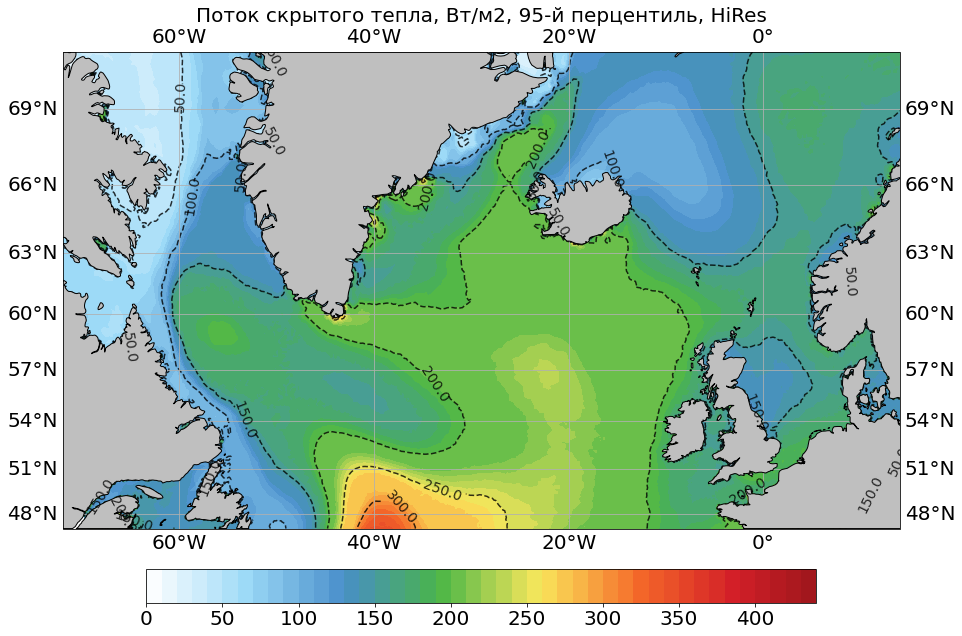

In [55]:
# Начиная с этой карты, идут карты потоков скрытого и явного тепла по разными перцентилями и с разными разрешениями
plot_map(lon_hr, lat_hr, slhf14_95th, "Поток скрытого тепла, Вт/м2, 95-й перцентиль, HiRes",\
         my_cmap,"","slhf14_95th", 0, 450, "")

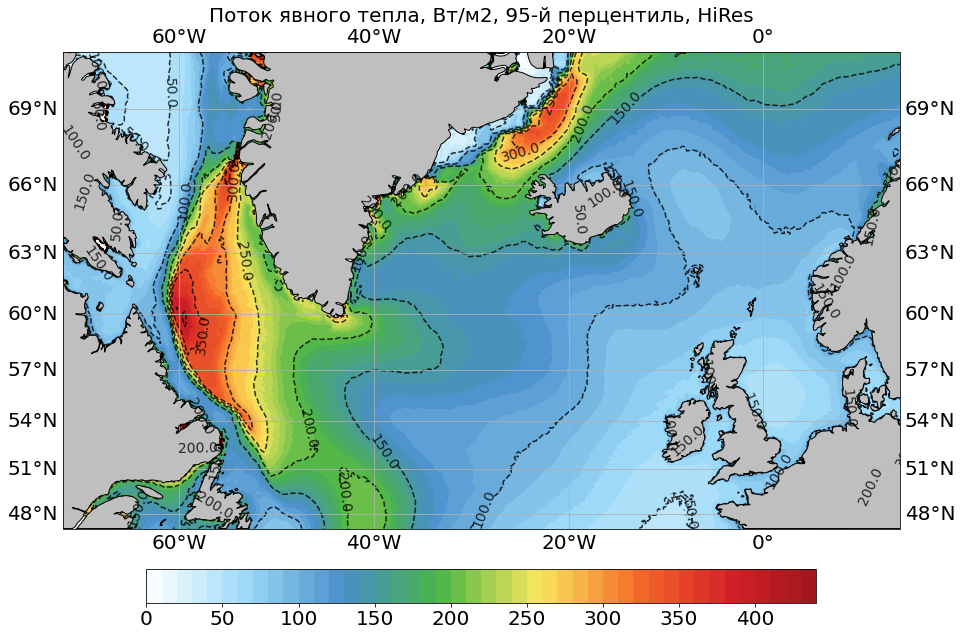

In [56]:
plot_map(lon_hr, lat_hr, sshf14_95th, "Поток явного тепла, Вт/м2, 95-й перцентиль, HiRes",\
         my_cmap,"","sshf14_95th", 0, 450, "")

/storage/kubrick/zhmiro/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'shading'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


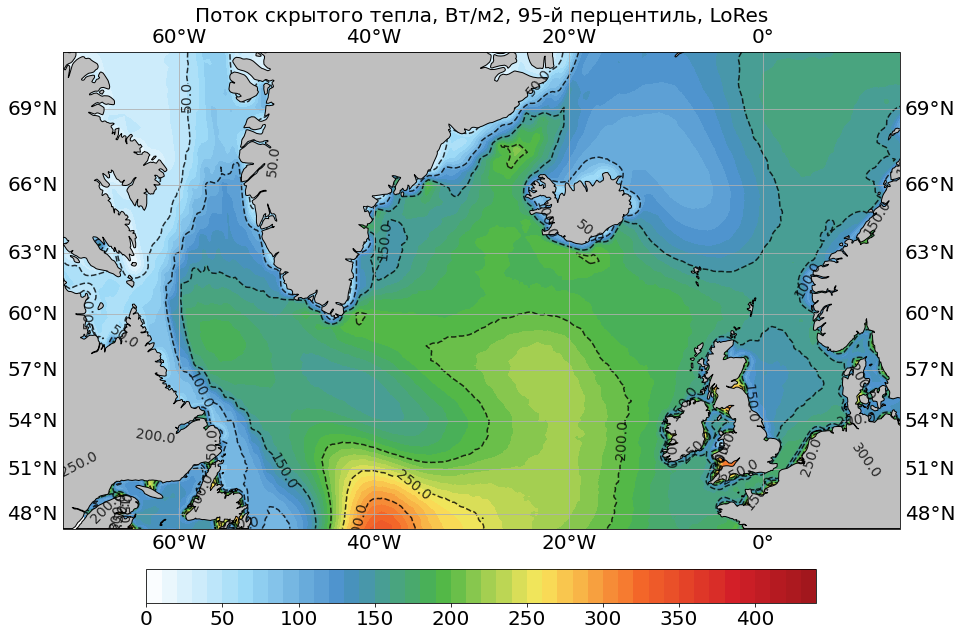

In [21]:
plot_map(lon_hr, lat_hr, slhf7714_95th, "Поток скрытого тепла, Вт/м2, 95-й перцентиль, LoRes",\
         my_cmap,"","slhf7714_95th", 0, 450, "")

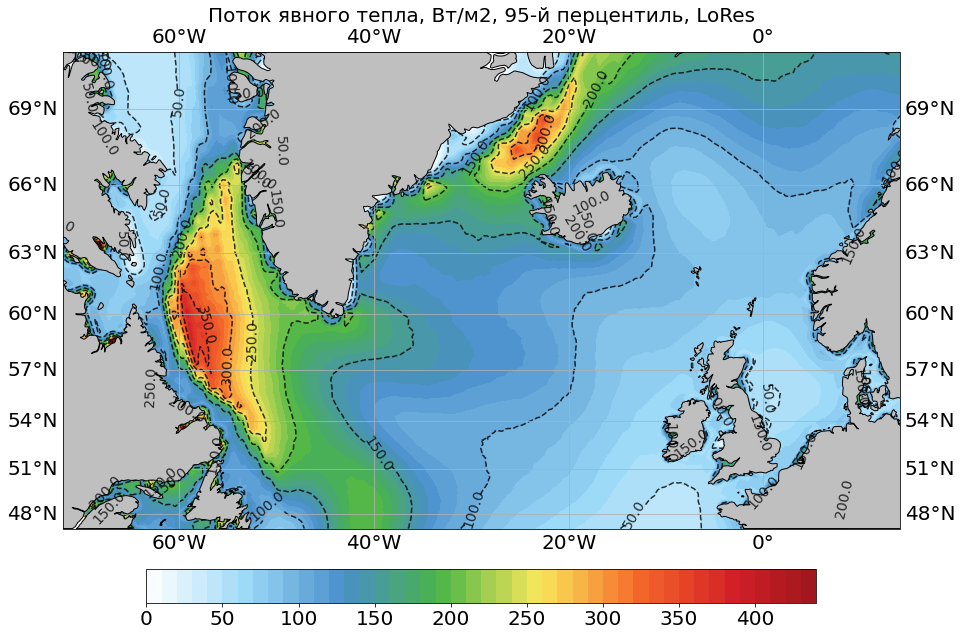

In [58]:
plot_map(lon_hr, lat_hr, sshf7714_95th, "Поток явного тепла, Вт/м2, 95-й перцентиль, LoRes",\
         my_cmap,"","sshf14_95th", 0, 450, "")

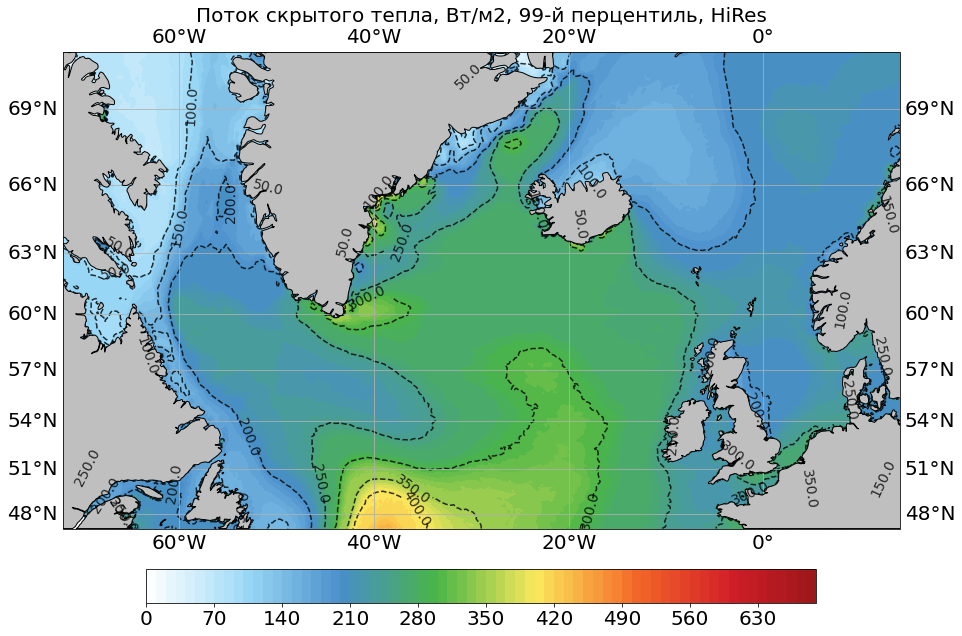

In [22]:
plot_map(lon_hr, lat_hr, slhf14_99th, "Поток скрытого тепла, Вт/м2, 99-й перцентиль, HiRes",\
         my_cmap,"","slhf14_99th", 0, 700, "")

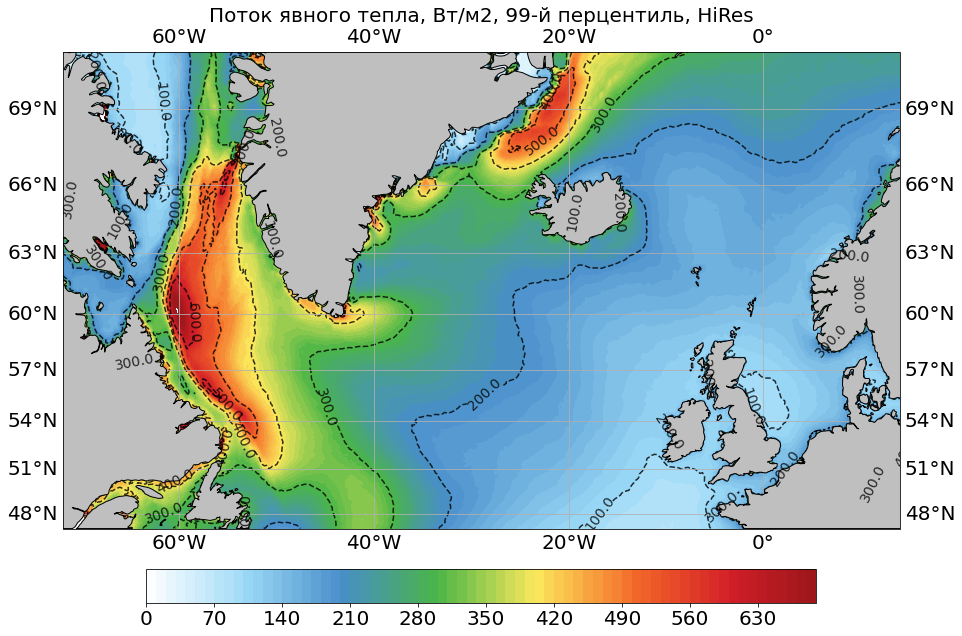

In [27]:
plot_map(lon_hr, lat_hr, sshf14_99th, "Поток явного тепла, Вт/м2, 99-й перцентиль, HiRes",\
         my_cmap,"","sshf14_99th", 0, 700, "")

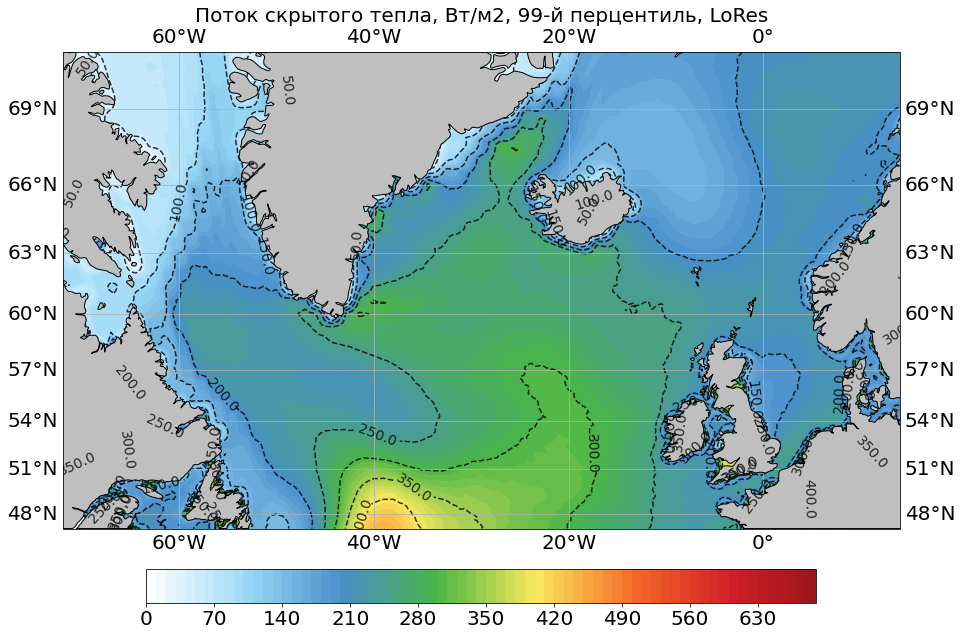

In [24]:
plot_map(lon_hr, lat_hr, slhf7714_99th, "Поток скрытого тепла, Вт/м2, 99-й перцентиль, LoRes",\
         my_cmap,"","slhf7714_99th", 0, 700, "")

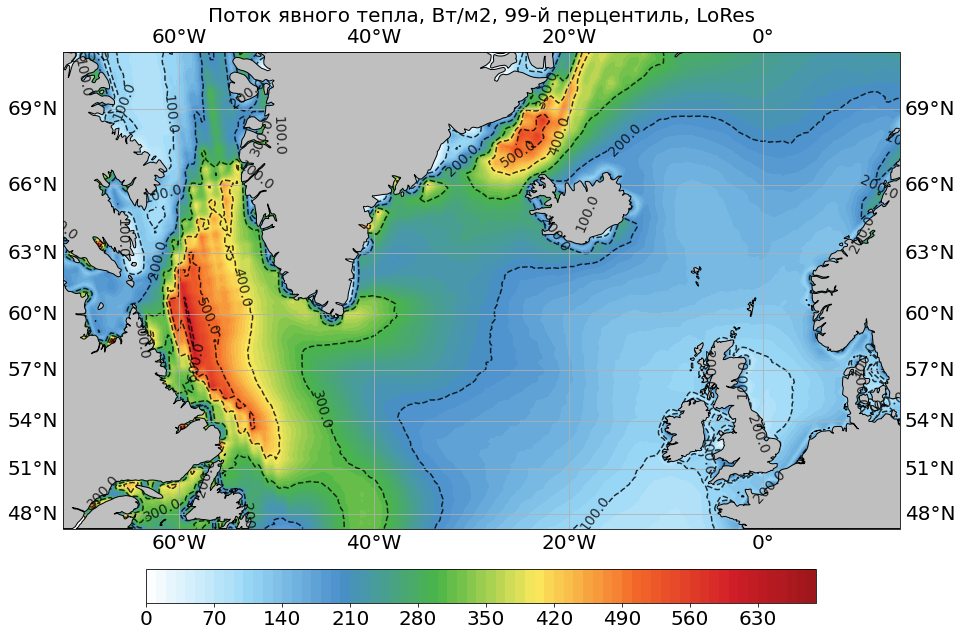

In [28]:
plot_map(lon_hr, lat_hr, sshf7714_99th, "Поток явного тепла, Вт/м2, 99-й перцентиль, LoRes",\
         my_cmap,"","sshf7714_99th", 0, 700, "")

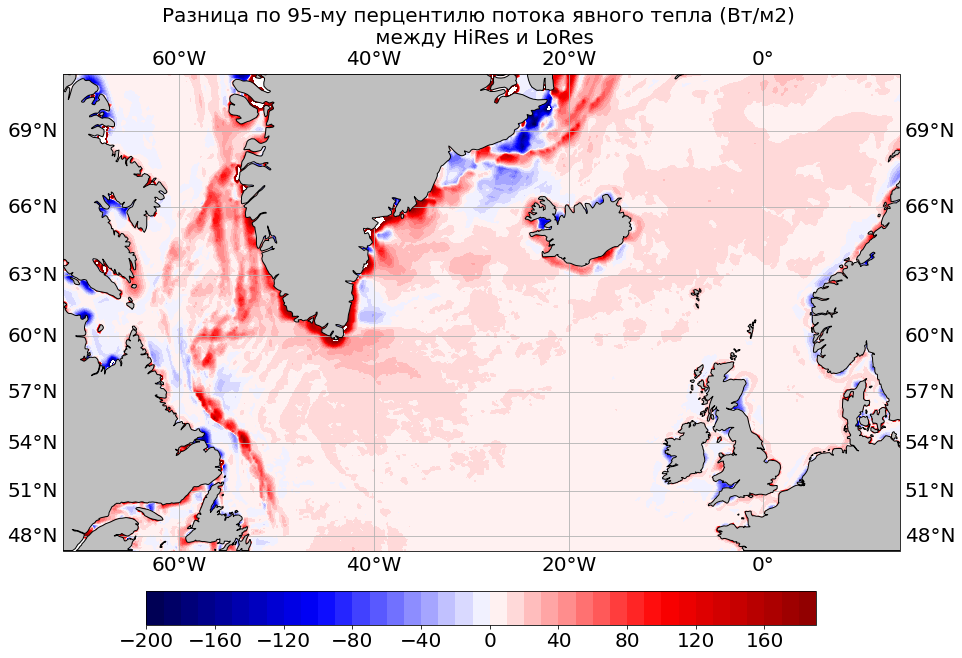

In [82]:
plot_map(lon_hr, lat_hr, hr_shf95-lr_shf95, \
         "Разница по 95-му перцентилю потока явного тепла (Вт/м2) \n между HiRes и LoRes", \
         "seismic","","hr-lr_shf95", -200, 200, "")

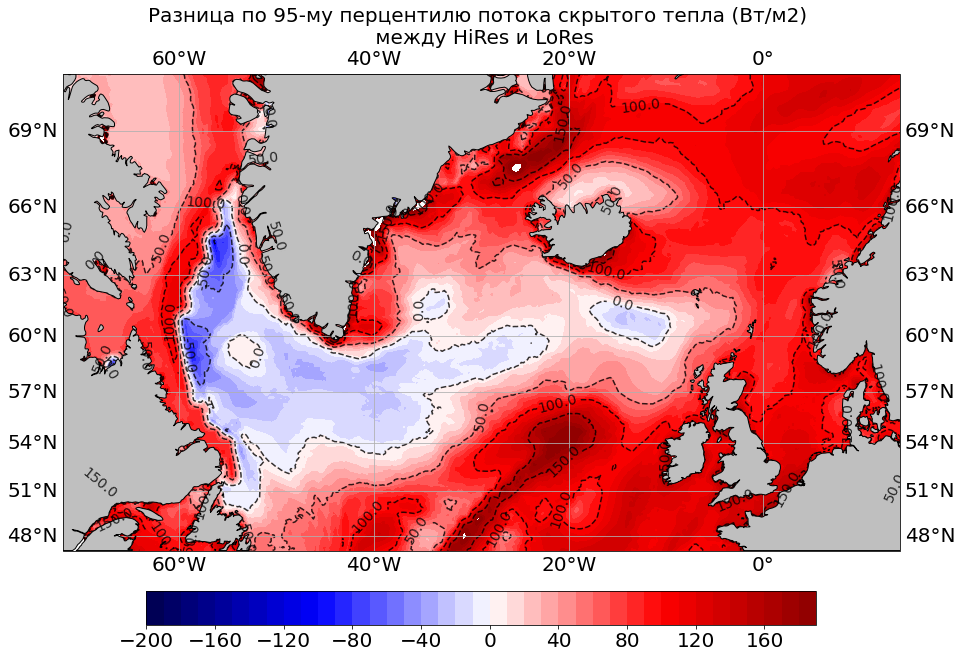

In [77]:
plot_map(lon_hr, lat_hr, hr_lhf95-lr_lhf95, \
         "Разница по 95-му перцентилю потока скрытого тепла (Вт/м2) \n между HiRes и LoRes", \
         "seismic","","hr-lr_lhf95", -200, 200, "")